<a href="https://colab.research.google.com/github/willisbridges/Powerlifting-EDA/blob/main/Powerlifting_Advanced_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#downloading the dataset from Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download open-powerlifting/powerlifting-database

 76% 41.0M/54.1M [00:00<00:00, 59.6MB/s]
100% 54.1M/54.1M [00:00<00:00, 88.7MB/s]


In [ ]:
! unzip powerlifting-database.zip

Archive:  powerlifting-database.zip
  inflating: openpowerlifting.csv    


In [ ]:
import pandas as pd
data = 'openpowerlifting.csv'
powerlifting = pd.read_csv(data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#performing EDA to identify possible hypothesis
powerlifting.head()

Name Sex Event  ... MeetCountry  MeetState       MeetName
0     Abbie Murphy   F   SBD  ...   Australia        VIC  Melbourne Cup
1      Abbie Tuong   F   SBD  ...   Australia        VIC  Melbourne Cup
2   Ainslee Hooper   F     B  ...   Australia        VIC  Melbourne Cup
3  Amy Moldenhauer   F   SBD  ...   Australia        VIC  Melbourne Cup
4     Andrea Rowan   F   SBD  ...   Australia        VIC  Melbourne Cup

[5 rows x 37 columns]

In [ ]:
powerlifting.shape

(1423354, 37)

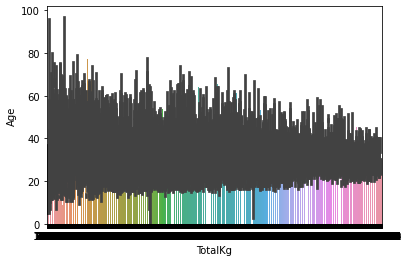

In [ ]:
import seaborn as sns
sns.barplot( data = powerlifting, x = 'TotalKg', y = 'Age')

In [ ]:

#Dropping columns
powerlifting_1 = powerlifting.drop( columns = ['IPFPoints' ,	'Tested' ,	'Country' ,	'Federation' , 'Date' ,	'MeetCountry' ,	'MeetState' ,	'MeetName'])
powerlifting_1.head()

Name Sex Event Equipment  ...  Place   Wilks McCulloch  Glossbrenner
0     Abbie Murphy   F   SBD     Wraps  ...      4  324.16    324.16        286.42
1      Abbie Tuong   F   SBD     Wraps  ...      2  378.07    378.07        334.16
2   Ainslee Hooper   F     B       Raw  ...      1   38.56     38.56         34.12
3  Amy Moldenhauer   F   SBD     Wraps  ...      3  345.61    345.61        305.37
4     Andrea Rowan   F   SBD     Wraps  ...      3  321.25    338.91        274.56

[5 rows x 29 columns]

In [ ]:
#Exploring null values
powerlifting_1.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
dtype: int64

In [ ]:
#dropping null values
powerlifting_1_Na = powerlifting_1.dropna()
powerlifting_1_Na

Name Sex Event  ...   Wilks  McCulloch Glossbrenner
3877          Kenan Resit   M   SBD  ...  394.21     394.21       385.64
4299           Allan Todd   M   SBD  ...  354.63     484.42       340.48
5283          Liam Turner   M   SBD  ...  211.20     270.34       205.84
6602     Rebeca Sotomayor   F   SBD  ...  354.69     354.69       312.55
7166            Jen Smith   F   SBD  ...  514.85     519.99       454.92
...                   ...  ..   ...  ...     ...        ...          ...
1366721   Eliana Marcillo   F   SBD  ...  445.08     449.54       393.36
1366722   Eliana Marcillo   F   SBD  ...  445.08     449.54       393.36
1367403   Anna Khudayarov   F   SBD  ...  565.92     565.92       496.57
1367638       Maria Ramos   F   SBD  ...  544.50     544.50       485.62
1381430    Maiju Hilander   F   SBD  ...  297.97     377.82       262.47

[235 rows x 29 columns]

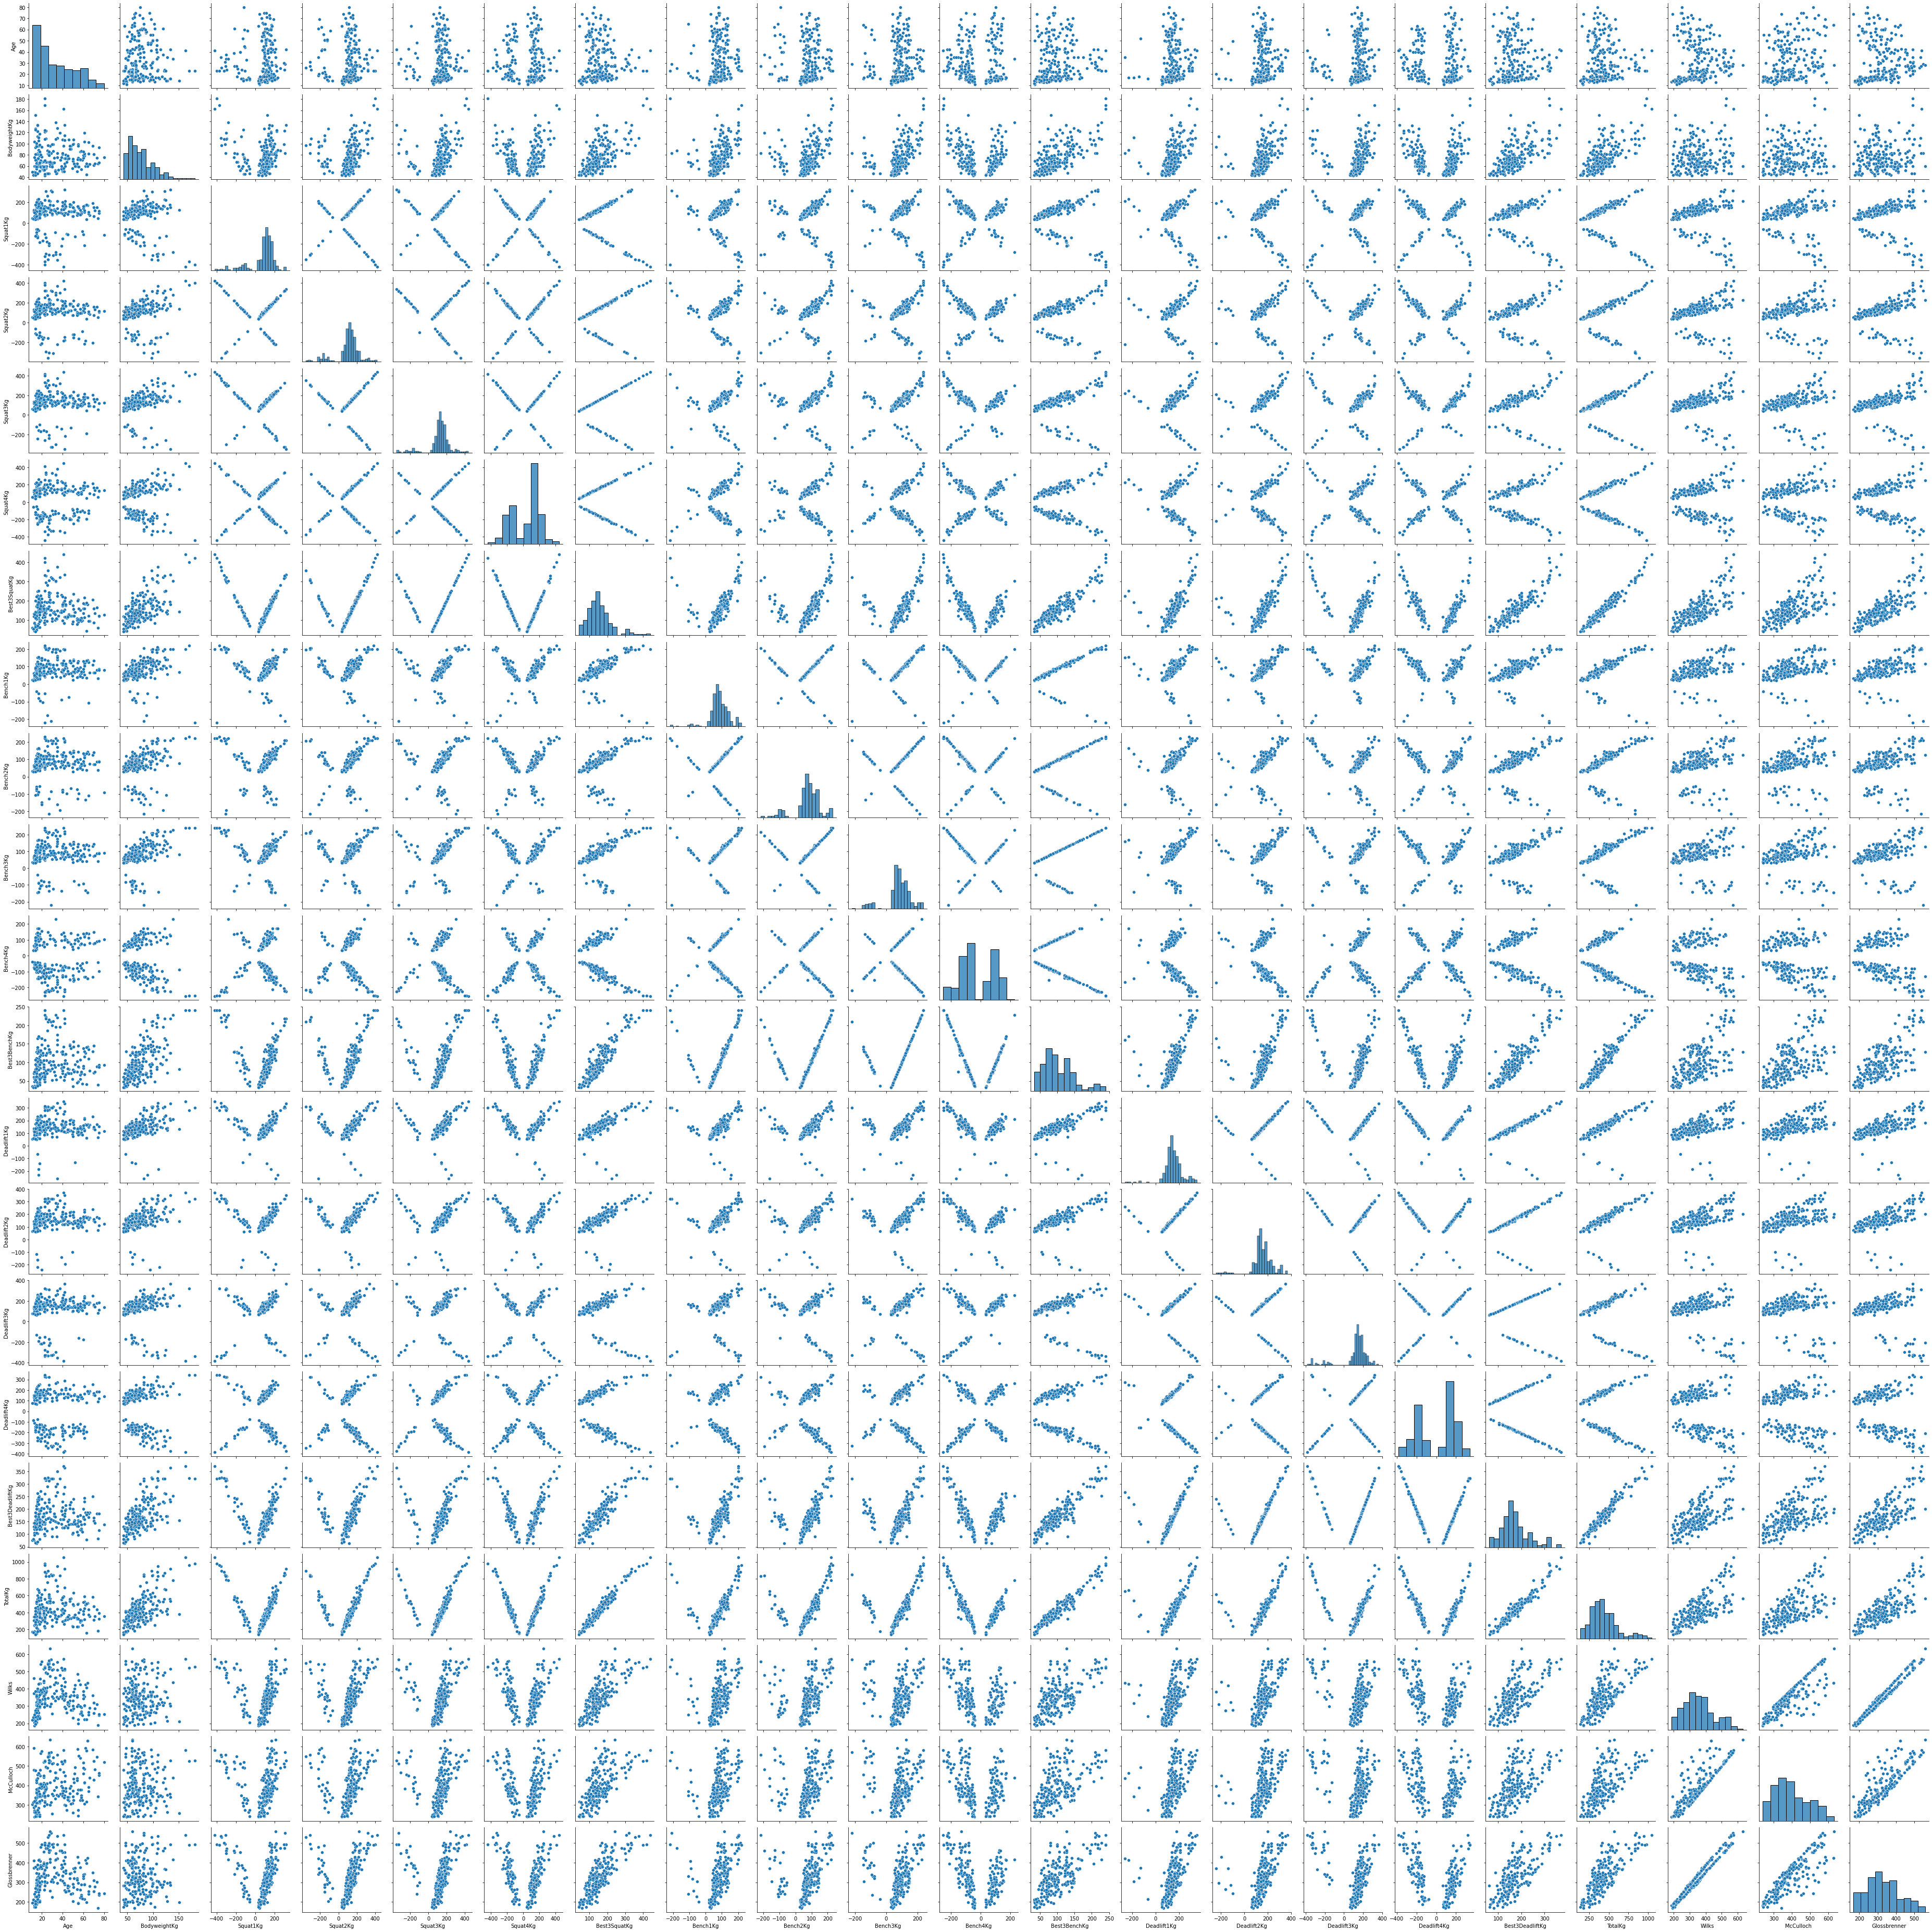

In [ ]:
sns.pairplot(powerlifting_1_Na)

In [ ]:
#dropping squat, bench, deadlift attempts
powerlifting_2 = powerlifting_1.drop( columns = ['Squat1Kg' ,	'Squat2Kg' ,	'Squat3Kg' , 'Squat4Kg', 'Bench1Kg' ,	'Bench2Kg' ,	'Bench3Kg' , 'Bench4Kg' , 'Deadlift1Kg' ,	'Deadlift2Kg' ,	'Deadlift3Kg' ,	'Deadlift4Kg'])
powerlifting_2.head()

Name Sex Event Equipment  ...  Place   Wilks McCulloch  Glossbrenner
0     Abbie Murphy   F   SBD     Wraps  ...      4  324.16    324.16        286.42
1      Abbie Tuong   F   SBD     Wraps  ...      2  378.07    378.07        334.16
2   Ainslee Hooper   F     B       Raw  ...      1   38.56     38.56         34.12
3  Amy Moldenhauer   F   SBD     Wraps  ...      3  345.61    345.61        305.37
4     Andrea Rowan   F   SBD     Wraps  ...      3  321.25    338.91        274.56

[5 rows x 17 columns]

In [ ]:
powerlifting_2.isnull().sum()

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                665827
AgeClass           636554
Division             8178
BodyweightKg        16732
WeightClassKg       13312
Best3SquatKg       391904
Best3BenchKg       147173
Best3DeadliftKg    341546
TotalKg            110170
Place                   0
Wilks              118947
McCulloch          119100
Glossbrenner       118947
dtype: int64

In [ ]:
powerlifting_2_na = powerlifting_2.dropna()
powerlifting_2_na.shape

(464059, 17)

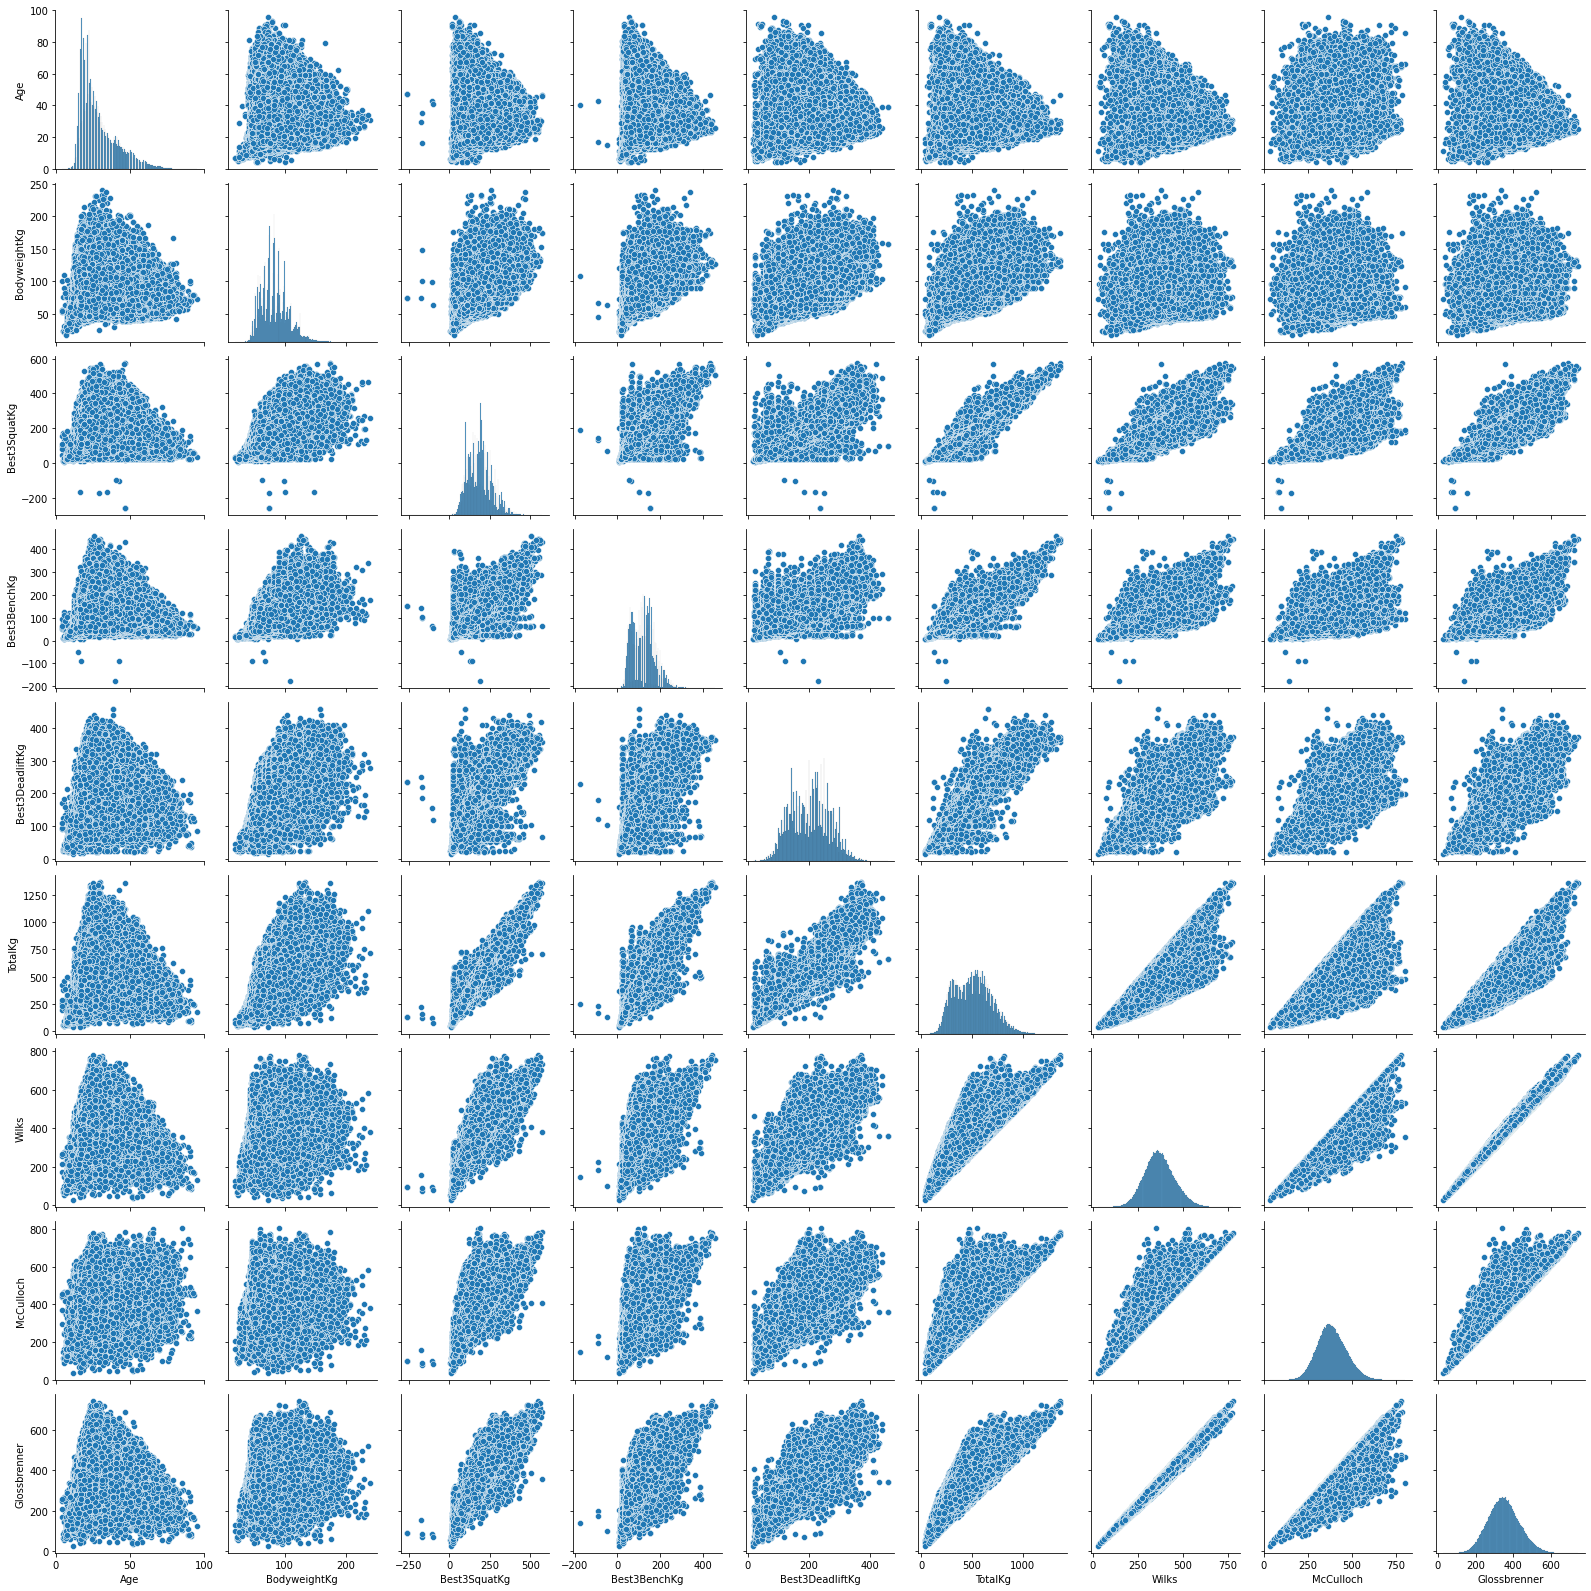

In [ ]:
sns.pairplot(powerlifting_2_na)

In [ ]:
powerlifting_2_na.head()

Name Sex Event Equipment  ...  Place   Wilks McCulloch  Glossbrenner
0     Abbie Murphy   F   SBD     Wraps  ...      4  324.16    324.16        286.42
1      Abbie Tuong   F   SBD     Wraps  ...      2  378.07    378.07        334.16
3  Amy Moldenhauer   F   SBD     Wraps  ...      3  345.61    345.61        305.37
4     Andrea Rowan   F   SBD     Wraps  ...      3  321.25    338.91        274.56
5    April Alvarez   F   SBD     Wraps  ...      5  354.74    354.74        312.20

[5 rows x 17 columns]

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


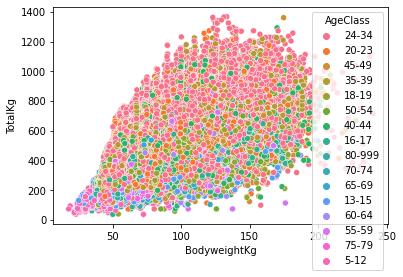

In [ ]:
sns.scatterplot( data = powerlifting_2_na, x = 'BodyweightKg', y = 'TotalKg', hue = 'AgeClass')

In [ ]:
#ensuring null values worked
powerlifting_2_na.value_counts(['Event'])

Event
SBD      464059
dtype: int64

In [ ]:
#We know gender is an easy categorical variable to convert to a dummy, but what about equipment?
powerlifting_2_na.value_counts(['Equipment'])

Equipment 
Raw           209459
Single-ply    164330
Wraps          72657
Multi-ply      17613
dtype: int64

In [ ]:
#easy dummy variable 
powerlifting_prefinal = pd.get_dummies(powerlifting_2_na, columns=['Sex'], drop_first=True)
powerlifting_prefinal.head()

Name Event Equipment  ...  McCulloch Glossbrenner Sex_M
0     Abbie Murphy   SBD     Wraps  ...     324.16       286.42     0
1      Abbie Tuong   SBD     Wraps  ...     378.07       334.16     0
3  Amy Moldenhauer   SBD     Wraps  ...     345.61       305.37     0
4     Andrea Rowan   SBD     Wraps  ...     338.91       274.56     0
5    April Alvarez   SBD     Wraps  ...     354.74       312.20     0

[5 rows x 17 columns]

In [ ]:
#Harder dummy variable
powerlifting_prefinal = pd.get_dummies(powerlifting_2_na, columns=['Equipment'])
powerlifting_prefinal.head()

Name Sex  ... Equipment_Single-ply  Equipment_Wraps
0     Abbie Murphy   F  ...                    0                1
1      Abbie Tuong   F  ...                    0                1
3  Amy Moldenhauer   F  ...                    0                1
4     Andrea Rowan   F  ...                    0                1
5    April Alvarez   F  ...                    0                1

[5 rows x 20 columns]

In [ ]:
#Okay going back to drop all irrelevant columns for my next dive and calling this final. Willrecreate dummy variables.
powerlifting_prefinal1 = powerlifting_2.drop( columns = ['Name' , 'Event' ,	'AgeClass' ,	'Division' , 'WeightClassKg' ,	'Best3SquatKg' ,	'Best3BenchKg' ,	'Best3DeadliftKg', 'Wilks', 'McCulloch', 'Glossbrenner', 'Place'])
powerlifting_prefinal1.head()

Sex Equipment   Age  BodyweightKg  TotalKg
0   F     Wraps  29.0          59.8    290.0
1   F     Wraps  29.0          58.5    332.5
2   F       Raw  40.0          55.4     32.5
3   F     Wraps  23.0          60.0    310.0
4   F     Wraps  45.0         104.0    390.0

In [ ]:
#time to remove null
powerlifting_prefinal1.isnull().sum()

Sex                  0
Equipment            0
Age             665827
BodyweightKg     16732
TotalKg         110170
dtype: int64

In [ ]:
powerlifting_prefinal2 = powerlifting_prefinal1.dropna()
powerlifting_prefinal2.isnull().sum()

Sex             0
Equipment       0
Age             0
BodyweightKg    0
TotalKg         0
dtype: int64

In [ ]:
#Time to get the dummies
powerlifting_prefinal3 = pd.get_dummies(powerlifting_prefinal2, columns=['Sex'], drop_first=True)
powerlifting_prefinal3.head()

Equipment   Age  BodyweightKg  TotalKg  Sex_M
0     Wraps  29.0          59.8    290.0      0
1     Wraps  29.0          58.5    332.5      0
2       Raw  40.0          55.4     32.5      0
3     Wraps  23.0          60.0    310.0      0
4     Wraps  45.0         104.0    390.0      0

In [ ]:
#more extensive dummy, final step before its time to run regression
powerlifting_final = pd.get_dummies(powerlifting_prefinal3, columns=['Equipment'])
powerlifting_final.head()


Age  BodyweightKg  ...  Equipment_Straps  Equipment_Wraps
0  29.0          59.8  ...                 0                1
1  29.0          58.5  ...                 0                1
2  40.0          55.4  ...                 0                0
3  23.0          60.0  ...                 0                1
4  45.0         104.0  ...                 0                1

[5 rows x 9 columns]

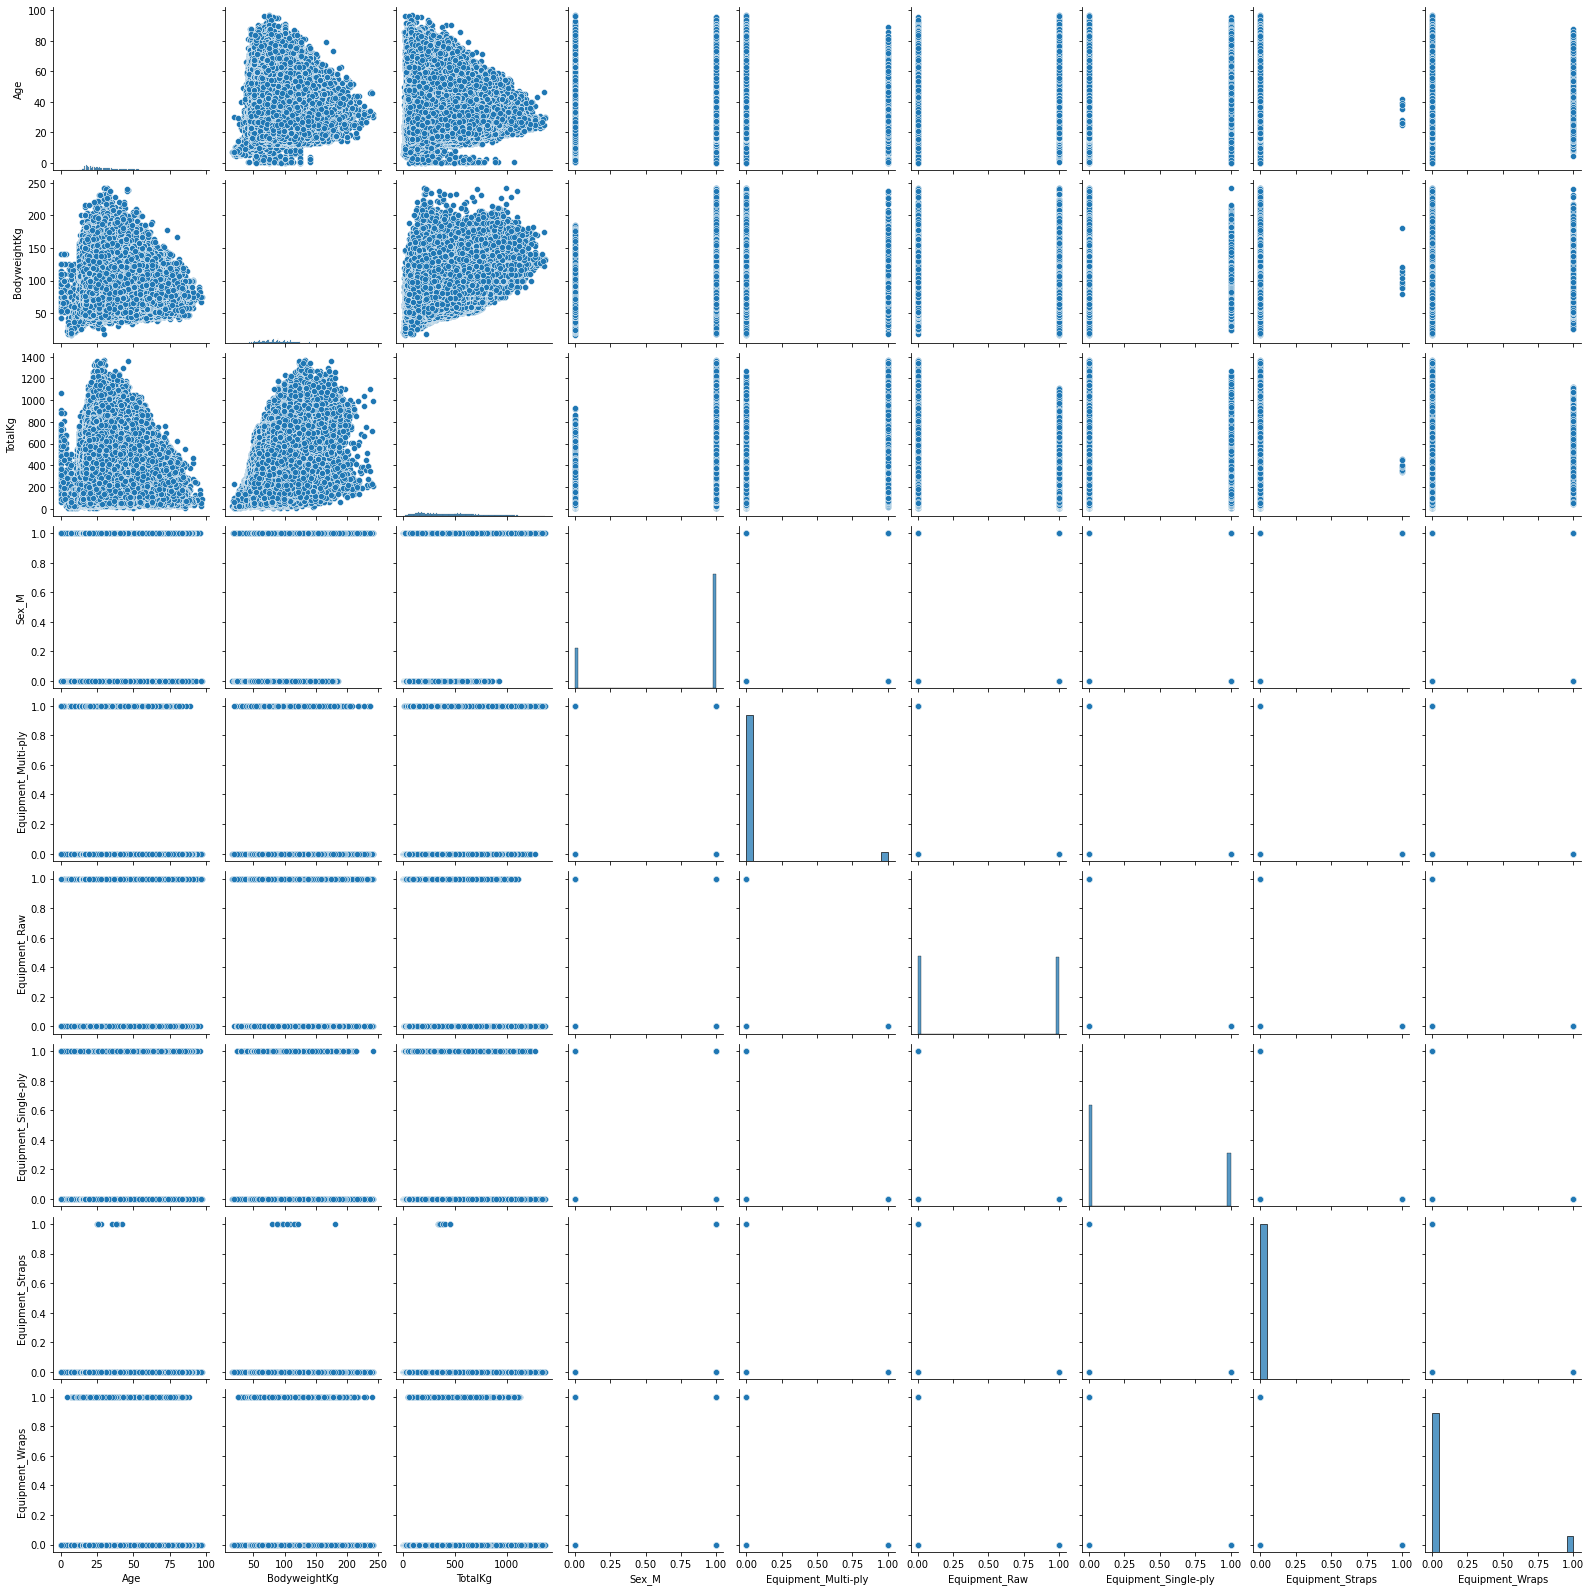

In [ ]:
#Now that we have a much more 'dialed in' dataset with maximal integrity, lets take a look at pairplots
sns.pairplot(powerlifting_final)

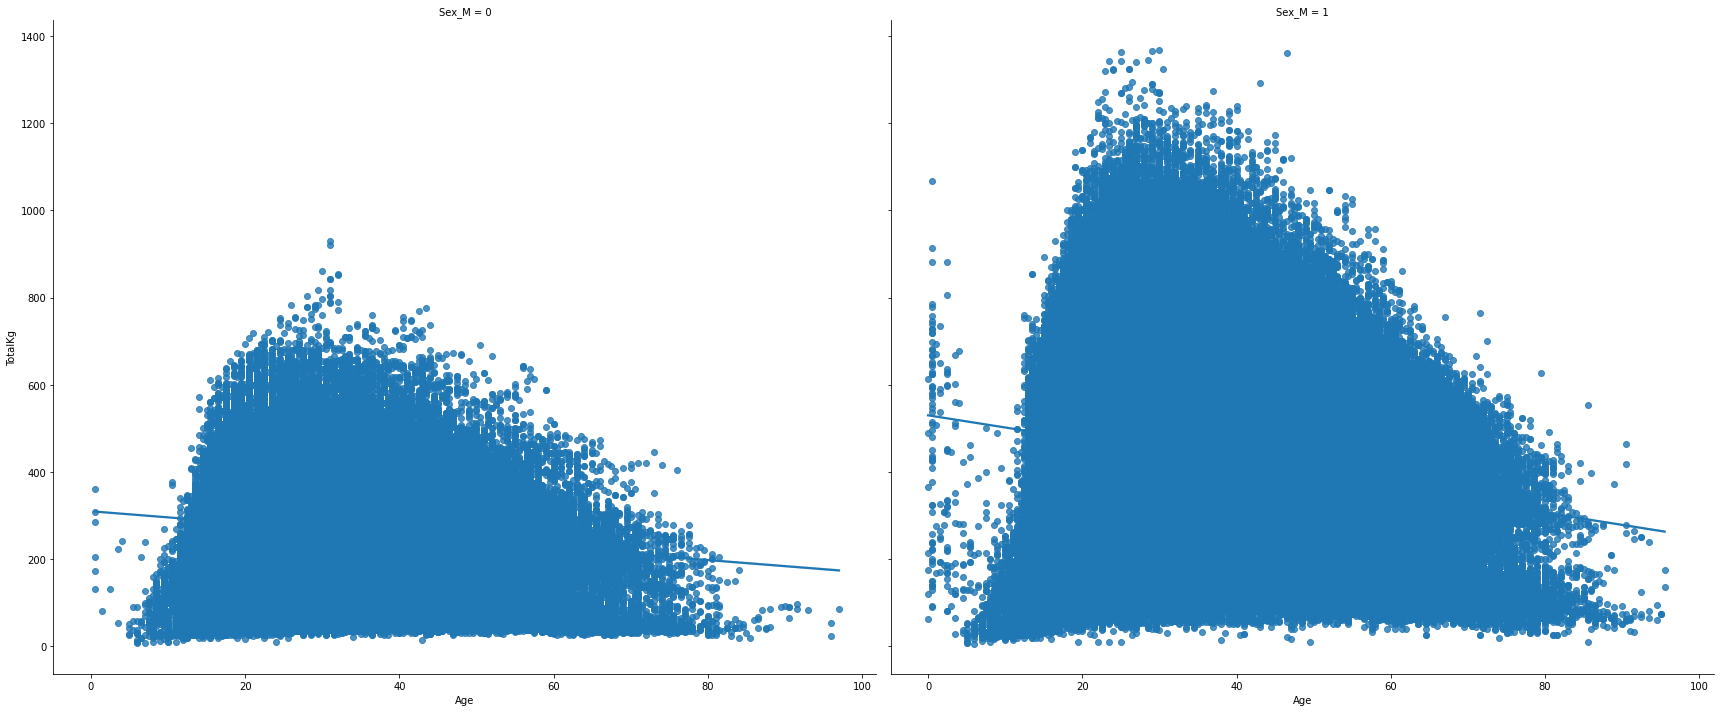

In [ ]:
#Time to examine the relationship of Bodyweight, Age, Sex and Equipment with Totalkg with some regression lines
from seaborn.relational import scatterplot
import matplotlib.pyplot as plt
#Age line by gender
Age_line = sns.lmplot( x = 'Age', y = 'TotalKg',  col = 'Sex_M', height = 10, aspect = 1.2, palette = 'Set1', data = powerlifting_final )
Age_line

In [ ]:
#Okay, so the regression line visualization techniques dont appear to be effective. Lets try building out the actual equation, one variable at a time

In [ ]:
#building a model, starting with age
from statsmodels.formula.api import ols
model_1 = ols('TotalKg ~ Age', powerlifting_final).fit()
print(model_1.summary())
#Lets save some variables
AgeRSquared = 0.019


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.350e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:39:49   Log-Likelihood:            -4.8307e+06
No. Observations:              709041   AIC:                         9.661e+06
Df Residuals:                  709039   BIC:                         9.661e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    466.9432      0.666    700.642      0.0

In [ ]:
#adding in the bodyweight variable
model_2 = ols('TotalKg ~ Age + BodyweightKg', powerlifting_final).fit()
print(model_2.summary())
#lets save some variables
BWrsquared = .169


                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                 7.217e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:42:46   Log-Likelihood:            -4.7716e+06
No. Observations:              709041   AIC:                         9.543e+06
Df Residuals:                  709038   BIC:                         9.543e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      176.3579      1.017    173.461   

In [ ]:
#adding in the gender variable
model_3 = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M)', powerlifting_final).fit()
print(model_3.summary())
#variables
Sexrsquared = .207


                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                 6.167e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:46:26   Log-Likelihood:            -4.7551e+06
No. Observations:              709041   AIC:                         9.510e+06
Df Residuals:                  709037   BIC:                         9.510e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       172.8764      0.993    174.009

In [ ]:
#Time to start adding in the equipmenet variables one by one to see how they effect the adjust r squared
model_4 = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M) + C(Equipment_Multi-ply)', powerlifting_final).fit()
print(model_4.summary())

PatsyError: ignored

In [ ]:
#oops, looks like I have to rename some columns to get ols to work
powerlifting_final.rename(columns={'Equipment_Multi-ply': 'Equipment_Multi_ply', 'Equipment_Single-ply': 'Equipment_Single_ply'}, inplace=True)
powerlifting_final.head()

Age  BodyweightKg  ...  Equipment_Straps  Equipment_Wraps
0  29.0          59.8  ...                 0                1
1  29.0          58.5  ...                 0                1
2  40.0          55.4  ...                 0                0
3  23.0          60.0  ...                 0                1
4  45.0         104.0  ...                 0                1

[5 rows x 9 columns]

In [ ]:
#lets continue with our model
model_4 = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M) + C(Equipment_Multi_ply)', powerlifting_final).fit()
print(model_4.summary())
#variables
MPrsquared = .207

#Note, this is changing the coefficients slightly

                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                 4.626e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:00:02   Log-Likelihood:            -4.7551e+06
No. Observations:              709041   AIC:                         9.510e+06
Df Residuals:                  709036   BIC:                         9.510e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
#single ply
model_5 = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M) + C(Equipment_Multi_ply) + C(Equipment_Single_ply)', powerlifting_final).fit()
print(model_5.summary())
#variables
MPrsquared = .219

#Note, adding the categorical variables changes the coefficients by alot

                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                 3.982e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:05:01   Log-Likelihood:            -4.7496e+06
No. Observations:              709041   AIC:                         9.499e+06
Df Residuals:                  709035   BIC:                         9.499e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
#adding in raw
model_6 = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M) + C(Equipment_Multi_ply) + C(Equipment_Single_ply) + C(Equipment_Raw)', powerlifting_final).fit()
print(model_6.summary())
#variables
Rawrsquared = .266

                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 4.288e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:08:22   Log-Likelihood:            -4.7276e+06
No. Observations:              709041   AIC:                         9.455e+06
Df Residuals:                  709034   BIC:                         9.455e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
#Adding in straps
model_7 = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M) + C(Equipment_Multi_ply) + C(Equipment_Single_ply) + C(Equipment_Raw) + C(Equipment_Straps)', powerlifting_final).fit()
print(model_7.summary())
#variables
Strapsrsquared = .266

                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 3.675e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:13:25   Log-Likelihood:            -4.7276e+06
No. Observations:              709041   AIC:                         9.455e+06
Df Residuals:                  709033   BIC:                         9.455e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
#Adding in wraps, the final variable
model_final = ols('TotalKg ~ Age + BodyweightKg + C(Sex_M) + C(Equipment_Multi_ply) + C(Equipment_Single_ply) + C(Equipment_Raw) + C(Equipment_Straps) + C(Equipment_Wraps)', powerlifting_final).fit()
print(model_final.summary())
#variables

                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 3.675e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:16:09   Log-Likelihood:            -4.7276e+06
No. Observations:              709041   AIC:                         9.455e+06
Df Residuals:                  709033   BIC:                         9.455e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       